In [1]:
import scanpy as sc
import pandas as pd 
import seaborn as sns
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
from plotnine import * 
from plotnine.data import mtcars

In [2]:
SS2_adata = sc.read_h5ad('SS2_processed.h5ad')

# making ROC curve and calculating AUC value

In [3]:
def auc_value(adata, group = 'sort', label_1 = 'Tumor', label_2 = 'Metastatic', pc_num = 1):
    df_loadings = pd.DataFrame(adata.obsm['X_pca'], index=adata.obs_names)[[pc_num]]
    df_loadings['label'] = ""
    for j in df_loadings.index:
        sort = adata.obs.loc[j, group]
        if sort == label_1:
            df_loadings.loc[j, 'label'] = 0
        elif sort == label_2:
            df_loadings.loc[j, 'label'] = 1
            
    false_positive_rate, true_positive_rate, threshold1 = roc_curve(df_loadings['label'].tolist(), df_loadings[pc_num].tolist())
    
    auc = roc_auc_score(df_loadings['label'].tolist(),df_loadings[pc_num].tolist())
    
    return false_positive_rate, true_positive_rate, auc

In [4]:
def auc_value_switch_labels(adata, group = 'sort', label_1 = 'Tumor', label_2 = 'Metastatic', pc_num = 1):
    df_loadings = pd.DataFrame(adata.obsm['X_pca'], index=adata.obs_names)[[pc_num]]
    df_loadings['label'] = ""
    for j in df_loadings.index:
        sort = adata.obs.loc[j, group]
        if sort == label_1:
            df_loadings.loc[j, 'label'] = 1
        elif sort == label_2:
            df_loadings.loc[j, 'label'] = 0
            
    false_positive_rate, true_positive_rate, threshold1 = roc_curve(df_loadings['label'].tolist(), df_loadings[pc_num].tolist())
    
    auc = roc_auc_score(df_loadings['label'].tolist(),df_loadings[pc_num].tolist())
    
    return false_positive_rate, true_positive_rate, auc

In [5]:
def ROC_curve(false_positive_rate, true_positive_rate, tumor_ID):

    
    plt.figure(figsize=(5, 5), dpi=50)
        
    lw = 2
    plt.plot(false_positive_rate, true_positive_rate, color='black',
         lw=lw)
    plt.plot([0, 1], [0, 1], color='gray', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('')
    plt.ylabel('')
    plt.title('')

#     plt.yaxis.grid(False)
#     plt.xaxis.grid(False)
    

    plt.tick_params(labelleft=True,labelbottom=True)

    plt.savefig('ROC_'+tumor_ID+'.pdf')
    plt.show()

    


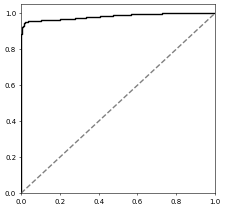

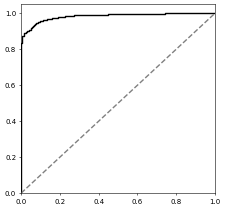

In [6]:
aut_df = pd.DataFrame(index=['ER_receptor','subtype'],columns=['AUC_value'])

# for ER receptor

false_positive_rate1, true_positive_rate1, auc1 = auc_value(SS2_adata, group = 'ER_receptor', label_1 = 'ER+', label_2 = 'ER-', pc_num = 0)
false_positive_rate2, true_positive_rate2, auc2 = auc_value_switch_labels(SS2_adata, group = 'ER_receptor', label_1 = 'ER+', label_2 = 'ER-', pc_num = 0)
        
if auc1 > auc2:
    ROC_curve(false_positive_rate1, true_positive_rate1, tumor_ID='SS2_global_ER_receptor')
    aut_df.loc['ER_receptor', 'AUC_value'] = auc1
else:
    ROC_curve(false_positive_rate2, true_positive_rate2, tumor_ID='SS2_global_ER_receptor')
    aut_df.loc['ER_receptor', 'AUC_value'] = auc2


# for subtype

false_positive_rate1, true_positive_rate1, auc1 = auc_value(SS2_adata, group = 'intrinsic_BC_type', label_1 = 'basal', label_2 = 'luminal B', pc_num = 0)
false_positive_rate2, true_positive_rate2, auc2 = auc_value_switch_labels(SS2_adata, group = 'intrinsic_BC_type', label_1 = 'basal', label_2 = 'luminal B', pc_num = 0)
        
if auc1 > auc2:
    ROC_curve(false_positive_rate1, true_positive_rate1, tumor_ID='SS2_global_subtype')
    aut_df.loc['subtype', 'AUC_value'] = auc1
else:
    ROC_curve(false_positive_rate2, true_positive_rate2, tumor_ID='SS2_global_subtype')
    aut_df.loc['subtype', 'AUC_value'] = auc2

In [7]:
aut_df.to_csv('SS2_ER_receptor_subtype_auc_value.csv')